#Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('raw_data.csv')
pd.set_option('display.max_columns', None)
df

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
1,True,True,CsSnBrI,CsSnBr0.3I2.7,NaN
2,True,True,CsSnBrI,CsSnBr1.5I1.5,NaN
3,True,True,CsSnBrI,CsSnBr2.7I0.3,NaN
4,True,True,CsSnBr,CsSnBr3,1.75
...,...,...,...,...,...
43374,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43375,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43376,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


#Dropping rows with Nan Value of bandgap

In [3]:
#Drop rows with Nan values of band_gap
print("Number of rows before removal:", df.shape[0])
df= df.dropna(subset=['Perovskite_band_gap'])
print("Number of rows after removal:", df.shape[0])
df

Number of rows before removal: 43379
Number of rows after removal: 32693


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43366,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43367,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43368,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


Dropping all rows where Sn is not present

In [5]:
print("Number of rows before removal:", df.shape[0])
df = df[df['Perovskite_composition_short_form'].str.contains('Sn', na=False)]
print("Number of rows after removal:", df.shape[0])

Number of rows before removal: 32693
Number of rows after removal: 711


#converting string value of band_gap into float

In [6]:
df['Perovskite_band_gap'] = pd.to_numeric(df['Perovskite_band_gap'], errors='coerce')

In [7]:
df.dtypes

Perovskite_dimension_3D                                bool
Perovskite_composition_perovskite_ABC3_structure     object
Perovskite_composition_short_form                    object
Perovskite_composition_long_form                     object
Perovskite_band_gap                                 float64
dtype: object

In [8]:
df.isna().sum()

Perovskite_dimension_3D                             0
Perovskite_composition_perovskite_ABC3_structure    0
Perovskite_composition_short_form                   0
Perovskite_composition_long_form                    0
Perovskite_band_gap                                 0
dtype: int64

#Taking true ABX3 structures only

In [9]:
# Print the number of rows before filtering
print(f"Number of rows before filtering: {len(df)}")

# Drop rows where 'Perovskite_composition_perovskite_ABC3_structure' is NaN
df1= df.dropna(subset=['Perovskite_composition_perovskite_ABC3_structure'])
# Replace NaN values in 'Perovskite_composition_perovskite_ABC3_structure' with True
#df1['Perovskite_composition_perovskite_ABC3_structure'] = df1['Perovskite_composition_perovskite_ABC3_structure'].fillna(True)

# Filter the DataFrame with rows having true perovskite ABX3 structure
df1 = df1[df1['Perovskite_dimension_3D']]
df1 = df1[df1['Perovskite_composition_perovskite_ABC3_structure']]

# Print the number of rows after filtering
print(f"Number of rows after filtering: {len(df1)}")
df1

Number of rows before filtering: 711
Number of rows after filtering: 613


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.270
4,True,True,CsSnBr,CsSnBr3,1.750
5,True,True,CsSnI,CsSnI3,1.270
6,True,True,CsSnBrI,CsSnBrI2,1.370
7,True,True,CsSnBrI,CsSnBr2I,1.650
...,...,...,...,...,...
42451,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42452,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42453,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42682,True,True,FAMAPbSnI,FA0.7MA0.3Pb0.5Sn0.5I3,1.220


#counting and removing multi absorber layers in cell

In [10]:
#df2=df1.copy()
multi_layer_count = df1['Perovskite_composition_long_form'].str.contains(r'\|').sum()

print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 2


In [11]:
print(f"Number of rows before filtering: {len(df1)}")

# Convert the column to string type
df1['Perovskite_composition_long_form'] = df1['Perovskite_composition_long_form'].astype(str)

# Remove rows with multiple perovskite layers
df_filtered = df1[~df1['Perovskite_composition_long_form'].str.contains(r'\|')]


# Print the number of rows after filtering
print(f"Number of rows after filtering: {len(df_filtered)}")

print("Filtered DataFrame:")
df_filtered

Number of rows before filtering: 613
Number of rows after filtering: 611
Filtered DataFrame:


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.270
4,True,True,CsSnBr,CsSnBr3,1.750
5,True,True,CsSnI,CsSnI3,1.270
6,True,True,CsSnBrI,CsSnBrI2,1.370
7,True,True,CsSnBrI,CsSnBr2I,1.650
...,...,...,...,...,...
42451,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42452,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42453,True,True,CsPbSnI,CsPb0.6Sn0.4I3,1.380
42682,True,True,FAMAPbSnI,FA0.7MA0.3Pb0.5Sn0.5I3,1.220


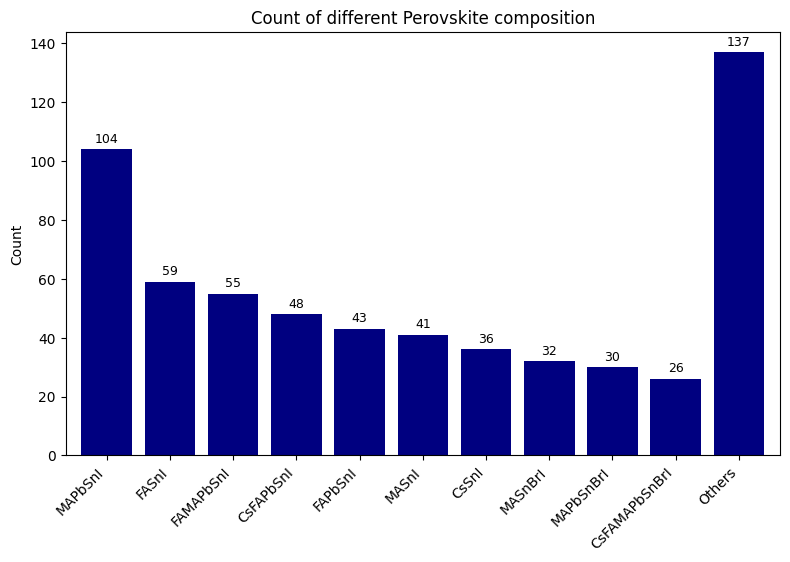

In [12]:
# Get the value counts for the column
value_counts = df_filtered['Perovskite_composition_short_form'].value_counts()

# Get the top 10 strings
top_10 = value_counts.nlargest(10)

# Sum the remaining counts and label them as "Others"
others_count = value_counts[10:].sum()

# Combine the top 10 with "Others"
top_10_with_others = pd.concat([top_10, pd.Series(others_count, index=['Others'])])

# Plotting the histogram
plt.figure(figsize=(8, 5.5))

# Customize color and bar width
ax = top_10_with_others.plot(kind='bar', color='navy', width=0.8)

# Add the counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
#plt.xlabel('Perovskite Composition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Count of different Perovskite composition')
plt.savefig('Count of different Perovskite composition.png')

# Show the plot
plt.show()

#Merging duplicate layers

In [13]:
print("\nNumber of rows before grouping:", df_filtered.shape[0])
df2 = df_filtered[['Perovskite_composition_short_form','Perovskite_composition_long_form', 'Perovskite_band_gap']].copy()

# Define a function to get the mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group by 'Perovskite_composition_long_form' and calculate mean of 'Perovskite_band_gap'
df2 = df2.groupby('Perovskite_composition_long_form', as_index=False).agg({
    'Perovskite_band_gap': mode,
})

# Count rows after grouping
print("Number of rows after grouping:", df2.shape[0])

# Display the grouped DataFrame
print("DataFrame after grouping:")
df2



Number of rows before grouping: 611
Number of rows after grouping: 181
DataFrame after grouping:


,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30
...,...,...
176,MASnBr3,2.08
177,MASnBrI2,1.46
178,MASnCl3,2.10
179,MASnF0.4I2.6,1.85


In [15]:
print("\nNumber of rows before filtering:", df2.shape[0])

# Elements to filter for
elements = ['MA', 'FA','BA', 'Cs', 'Pb', 'Sn', 'I', 'Br']

# Create a regex pattern to match only the specified elements
allowed_elements_pattern = r'^(Cs|MA|FA|Pb|Sn|I|Br|[0-9\.])+(?:[\s]*)*$'

# Filter the DataFrame
df2_filtered = df2[df2['Perovskite_composition_long_form'].str.contains(allowed_elements_pattern, regex=True, na=False)]

# Reset index of the final DataFrame
df2_filtered = df2_filtered.reset_index(drop=True)

# Display the filtered DataFrame and counts
print("Filtered DataFrame:")
print("Number of rows after filtering:", df2_filtered.shape[0])
df2_filtered


Number of rows before filtering: 181
Filtered DataFrame:
Number of rows after filtering: 160


,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30
...,...,...
155,MASnBr2.64I0.36,1.83
156,MASnBr2I,1.77
157,MASnBr3,2.08
158,MASnBrI2,1.46


In [18]:
df3 = df2_filtered[['Perovskite_composition_long_form', 'Perovskite_band_gap']].copy()

df3.reset_index(drop=True, inplace=True)
df3

,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30
...,...,...
155,MASnBr2.64I0.36,1.83
156,MASnBr2I,1.77
157,MASnBr3,2.08
158,MASnBrI2,1.46


In [19]:
df3.rename(columns={'Perovskite_composition_long_form': 'perovskite', 'Perovskite_band_gap': 'E_g'}, inplace=True)
# Define regex pattern to extract elements and their fractions
pattern = re.compile(r'(Cs|MA|FA|Pb|Sn|I|Br)(\d*\.\d+|\d*)')

# Function to parse the ABX3 string
def parse_abx3(string):
    matches = pattern.findall(string)
    elements = {}
    for element, fraction in matches:
        # Convert fraction to float, default to 1 if fraction is missing
        fraction = float(fraction) if fraction else 1.0
        elements[element] = fraction
    return elements

# Apply the function to the DataFrame column and create new columns
parsed_elements = df3['perovskite'].apply(parse_abx3)
elements_df = pd.json_normalize(parsed_elements)
elements_df = elements_df.fillna(0)
result_df = df3.join(elements_df)

result_df

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27,0.025,0.475,0.50,0.50,0.50,3.00,0.00
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26,0.050,0.450,0.50,0.50,0.50,3.00,0.00
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22,0.050,0.500,0.45,0.50,0.50,3.00,0.00
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36,0.050,0.680,0.26,0.75,0.25,2.60,0.40
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30,0.050,0.790,0.16,0.25,0.75,2.50,0.50
...,...,...,...,...,...,...,...,...,...
155,MASnBr2.64I0.36,1.83,0.000,0.000,1.00,0.00,1.00,0.36,2.64
156,MASnBr2I,1.77,0.000,0.000,1.00,0.00,1.00,1.00,2.00
157,MASnBr3,2.08,0.000,0.000,1.00,0.00,1.00,0.00,3.00
158,MASnBrI2,1.46,0.000,0.000,1.00,0.00,1.00,2.00,1.00


In [20]:
# Desired column order
desired_order = ['perovskite', 'E_g', 'Cs', 'FA', 'MA', 'Pb', 'Sn', 'I', 'Br']

# Reorder the DataFrame columns
result_df = result_df[desired_order]
result_df

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27,0.025,0.475,0.50,0.50,0.50,3.00,0.00
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26,0.050,0.450,0.50,0.50,0.50,3.00,0.00
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22,0.050,0.500,0.45,0.50,0.50,3.00,0.00
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36,0.050,0.680,0.26,0.75,0.25,2.60,0.40
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30,0.050,0.790,0.16,0.25,0.75,2.50,0.50
...,...,...,...,...,...,...,...,...,...
155,MASnBr2.64I0.36,1.83,0.000,0.000,1.00,0.00,1.00,0.36,2.64
156,MASnBr2I,1.77,0.000,0.000,1.00,0.00,1.00,1.00,2.00
157,MASnBr3,2.08,0.000,0.000,1.00,0.00,1.00,0.00,3.00
158,MASnBrI2,1.46,0.000,0.000,1.00,0.00,1.00,2.00,1.00


In [21]:
# Calculate sums for A, B, and X sites
a_site_sums = result_df[['Cs', 'FA', 'MA']].sum(axis=1)
b_site_sums = result_df[['Pb', 'Sn']].sum(axis=1)
x_site_sums = result_df[['I', 'Br']].sum(axis=1)

# Count valid and invalid rows
a_site_valid = (a_site_sums == 1).sum()
a_site_invalid = (a_site_sums != 1).sum()
b_site_valid = (b_site_sums == 1).sum()
b_site_invalid = (b_site_sums != 1).sum()
x_site_valid = (x_site_sums == 3).sum()
x_site_invalid = (x_site_sums != 3).sum()

# Print results
print(f"A site valid: {a_site_valid}, invalid: {a_site_invalid}")
print(f"B site valid: {b_site_valid}, invalid: {b_site_invalid}")
print(f"X site valid: {x_site_valid}, invalid: {x_site_invalid}")

A site valid: 155, invalid: 5
B site valid: 149, invalid: 11
X site valid: 155, invalid: 5


In [22]:
invalid_rows = result_df[(a_site_sums != 1) | (b_site_sums != 1) | (x_site_sums != 3)]

# Display invalid rows
print("Invalid rows:")
invalid_rows

Invalid rows:


,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36,0.05,0.68,0.26,0.75,0.2500,2.60,0.40
11,Cs0.05FA0.79MA0.16Pb0.84Sn0.84Br0.52I2.48,1.38,0.05,0.79,0.16,0.84,0.8400,2.48,0.52
36,Cs0.1MA0.9Pb0.7Sn0.255I3,1.39,0.10,0.00,0.90,0.70,0.2550,3.00,0.00
38,Cs0.25FA0.75Pb0.37Sn0.6255I3,1.24,0.25,0.75,0.00,0.37,0.6255,3.00,0.00
52,Cs2SnI6,1.48,2.00,0.00,0.00,0.00,1.0000,6.00,0.00
67,FA0.33MA0.66Pb0.66Sn0.33I3,1.30,0.00,0.33,0.66,0.66,0.3300,3.00,0.00
77,FA0.6MA0.4Pb0.6Sn0.6I3,1.25,0.00,0.60,0.40,0.60,0.6000,3.00,0.00
78,FA0.6MA0.4PbSn0.6I0.4,1.25,0.00,0.60,0.40,1.00,0.6000,0.40,0.00
79,FA0.6MA0.4Sn0.6I3,1.25,0.00,0.60,0.40,0.00,0.6000,3.00,0.00
82,FA0.75Sn0.25I3,1.40,0.00,0.75,0.00,0.00,0.2500,3.00,0.00


In [23]:
# Calculate sums for A, B, and X sites
a_site_sums = result_df[['Cs', 'FA', 'MA']].sum(axis=1)
b_site_sums = result_df[['Pb', 'Sn']].sum(axis=1)
x_site_sums = result_df[['I', 'Br']].sum(axis=1)

# Filter based on ±0.25 tolerance
a_site_valid = ((a_site_sums >= 0.90) & (a_site_sums <= 1.10))
b_site_valid = ((b_site_sums >= 0.90) & (b_site_sums <= 1.10))
x_site_valid = ((x_site_sums >= 2.90) & (x_site_sums <= 3.10))

# Filter dataframe to keep valid rows
valid_rows = result_df[a_site_valid & b_site_valid & x_site_valid]

# Print valid rows
valid_rows.reset_index(drop=True, inplace=True)
print("Valid rows:")
valid_rows

Valid rows:


,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27,0.025,0.475,0.50,0.50,0.50,3.00,0.00
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26,0.050,0.450,0.50,0.50,0.50,3.00,0.00
2,Cs0.05FA0.5MA0.45Pb0.5Sn0.5I3,1.22,0.050,0.500,0.45,0.50,0.50,3.00,0.00
3,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.36,0.050,0.680,0.26,0.75,0.25,2.60,0.40
4,Cs0.05FA0.79MA0.16Pb0.25Sn0.75Br0.5I2.5,1.30,0.050,0.790,0.16,0.25,0.75,2.50,0.50
...,...,...,...,...,...,...,...,...,...
144,MASnBr2.64I0.36,1.83,0.000,0.000,1.00,0.00,1.00,0.36,2.64
145,MASnBr2I,1.77,0.000,0.000,1.00,0.00,1.00,1.00,2.00
146,MASnBr3,2.08,0.000,0.000,1.00,0.00,1.00,0.00,3.00
147,MASnBrI2,1.46,0.000,0.000,1.00,0.00,1.00,2.00,1.00


#Heatmap Analysis of cleaned data

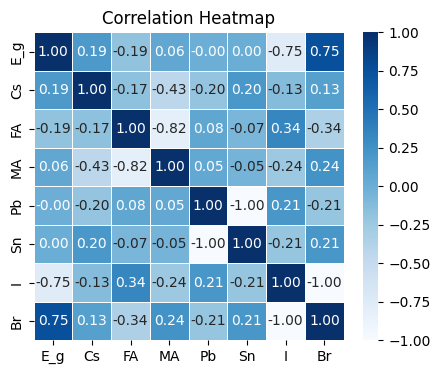

In [24]:
df4=valid_rows.iloc[:,1:]
corr_matrix = df4.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('correlation_heatmap.png')
plt.show()

In [25]:
valid_rows.to_csv('cleaned_df_Eg_Sn.csv', index=False)

#Download the CSV file
# from google.colab import files
# files.download('cleaned_df_Eg.csv')